We need to import these libraries for the data 
Here, I am trying to run multiple linear regression with mulitple variables without using sklearn , and understand the background math steps.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import copy
import math
import os 
%matplotlib inline

In [60]:
df = pd.read_csv(r"C:\Users\hhpla\Downloads\Housing.csv")

In [61]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [62]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [63]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [64]:
df.shape

(545, 13)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [66]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [67]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [68]:
df.duplicated().sum()

0

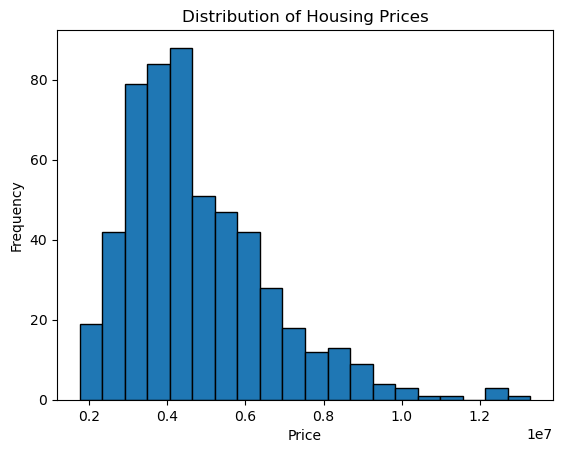

In [69]:
plt.hist(df['price'],bins=20,edgecolor='black')
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

In [70]:
int_cols=df.select_dtypes(include=np.number).columns
sns.heatmap(df[int_cols].corr(),annot=True)

<Axes: >

In [71]:
data=df.copy

In [72]:
X=df.drop('price',axis=1)
y=df['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [73]:
X = pd.get_dummies(X,drop_first=True)
# even tho sklearn can train the data directly , we still have to convet 
# so our math operation works.pd.get_dummie()change categories data into 
# one hot encoding . drop_first lower the data duplication .
X = X.astype(int)

X=X.to_numpy()
y=y.to_numpy()

In [74]:
print(X[:10])

[[ 7420     4     2     3     2     1     0     0     0     1     1     0
      0]
 [ 8960     4     4     4     3     1     0     0     0     1     0     0
      0]
 [ 9960     3     2     2     2     1     0     1     0     0     1     1
      0]
 [ 7500     4     2     2     3     1     0     1     0     1     1     0
      0]
 [ 7420     4     1     2     2     1     1     1     0     1     0     0
      0]
 [ 7500     3     3     1     2     1     0     1     0     1     1     1
      0]
 [ 8580     4     3     4     2     1     0     0     0     1     1     1
      0]
 [16200     5     3     2     0     1     0     0     0     0     0     0
      1]
 [ 8100     4     1     2     2     1     1     1     0     1     1     0
      0]
 [ 5750     3     2     4     1     1     1     0     0     1     1     0
      1]]


In [75]:
def zscore_normalize_features(X):
    ## feature scaling all features ,without it we might faced memory overflow.
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    
    return X_norm

In [76]:
print(X[:10])

X=zscore_normalize_features(X)
print(X[:10])

[[ 7420     4     2     3     2     1     0     0     0     1     1     0
      0]
 [ 8960     4     4     4     3     1     0     0     0     1     0     0
      0]
 [ 9960     3     2     2     2     1     0     1     0     0     1     1
      0]
 [ 7500     4     2     2     3     1     0     1     0     1     1     0
      0]
 [ 7420     4     1     2     2     1     1     1     0     1     0     0
      0]
 [ 7500     3     3     1     2     1     0     1     0     1     1     1
      0]
 [ 8580     4     3     4     2     1     0     0     0     1     1     1
      0]
 [16200     5     3     2     0     1     0     0     0     0     0     0
      1]
 [ 8100     4     1     2     2     1     1     1     0     1     1     0
      0]
 [ 5750     3     2     4     1     1     1     0     0     1     1     0
      1]]
[[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249  0.40562287
  -0.46531479 -0.73453933 -0.2192645   1.4726183   1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.7

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Reset indices ,always try to check the shape of data .
print(f"shape of X_train{X_train.shape}, shape of y train{y_train.shape}")
print(f"shape of X_test{X_test.shape}, shape of y_test{y_test.shape}")

shape of X_train(436, 13), shape of y train(436,)
shape of X_test(109, 13), shape of y_test(109,)


In [78]:
def compute_cost(x,y,w,b):
    ## computing the cost ,beware we are looping through all the observation , not features.
    m=x.shape[0]## 436 not 13
    
    cost = 0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
        
    return cost

In [79]:
n=X_train.shape[1]
init_w=np.zeros(n)## we will get the number of features and create initilal_w.
init_b=0
total_cost=compute_cost(X_train,y_train,init_w,init_b)
print(total_cost)

12872727643285.55


In [80]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    ## computing the gradient ,beware we are looping through all the observation , not features.

    temp_dj_dw=0
    temp_dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_db_i=f_wb_i-y[i]
        dj_dw_i=(f_wb_i-y[i])*x[i]
        temp_dj_db+=dj_db_i
        temp_dj_dw+=dj_dw_i
        
    dj_db=temp_dj_db/m
    dj_dw=temp_dj_dw/m
    
    return dj_db,dj_dw

In [81]:
gradient=compute_gradient(X_train,y_train,init_w,init_b)
print(gradient)
X_train.shape[1]

(-4742066.513761468, array([-984455.88840328, -614051.67952043, -725286.63094339,
       -681101.2536599 , -650985.32695856, -447440.53102286,
       -389890.85455015, -325465.03386558, -169235.6871688 ,
       -768513.53303294, -532307.43395683,  -88688.72640427,
        425764.58818252]))


13

In [82]:
def gradient_descent(x,y,w_in,b_in,compute_cost,compute_gradient,alpha,iterations):
    # computing gradient descent
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(iterations):
        dj_db,dj_dw=compute_gradient(x,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        
        if i<100000:# Without this check, if there are many iterations (e.g., millions), appending to J_history could:
#Exhaust memory (resource exhaustion).
            cost=compute_cost(x,y,w,b)
            J_history.append(cost)
        if i%math.ceil(iterations/10)==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w,b,J_history

In [83]:
iterations=10000
alpha = 0.01
w_final,b_final,J_hist=gradient_descent(X_train,y_train,init_w,init_b,compute_cost,compute_gradient,alpha,iterations)

Iteration    0: Cost 12606350102665.58
Iteration 1000: Cost 540909127700.11
Iteration 2000: Cost 540908459603.16
Iteration 3000: Cost 540908459484.32
Iteration 4000: Cost 540908459484.28
Iteration 5000: Cost 540908459484.28
Iteration 6000: Cost 540908459484.28
Iteration 7000: Cost 540908459484.28
Iteration 8000: Cost 540908459484.28
Iteration 9000: Cost 540908459484.28


In [84]:
print(w_final,b_final)


[ 541976.79890552  123153.78499486  429450.49012758  396550.23343983
  194689.60224234  153827.76751457  139795.79866545  143945.50520336
  180374.29153683  410257.42203497  250630.60496747  -33872.92822802
 -195214.12116192] 4769363.045067989


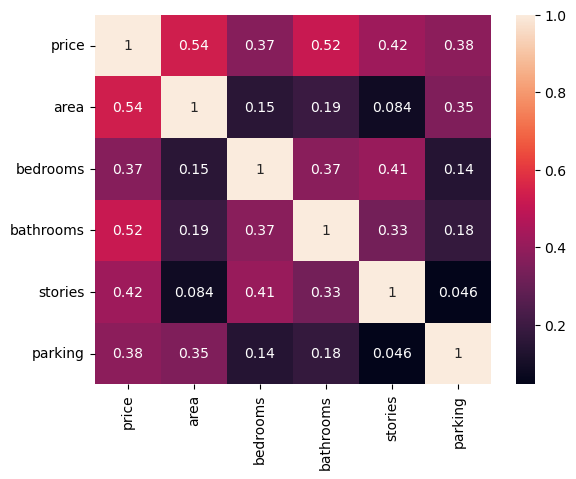

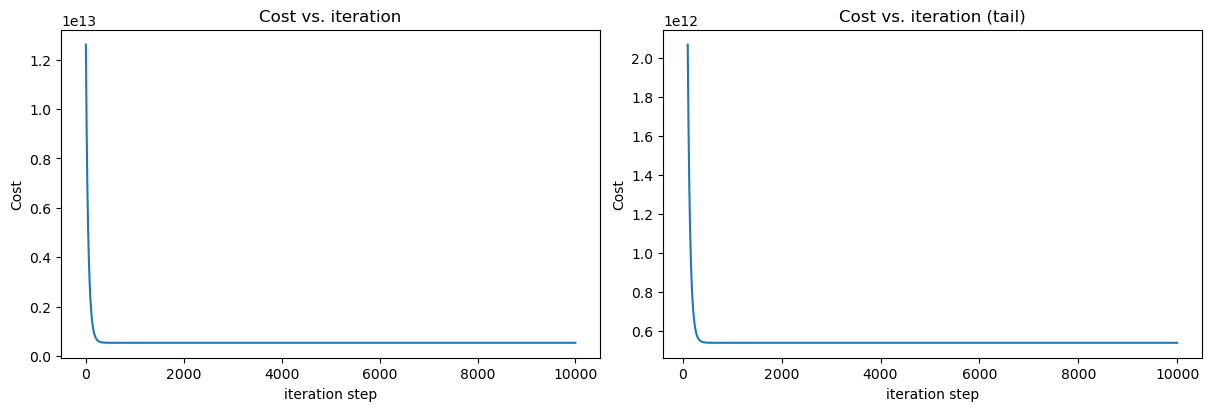

In [85]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [86]:
def R_squared(x,y,w,b):
    m=x.shape[0]
    sqr_error=0
    mean_sqr_error=0
    mu=np.mean(y,axis=0)
  
    for i in range(m):
        y_pred=np.dot(x[i],w)+b
        temp_sqr_error=(y[i]-y_pred)**2
        sqr_error+=temp_sqr_error
        
        temp_mean_sqr_error=(y[i]-mu)**2
        mean_sqr_error+=temp_mean_sqr_error
        
    R_squared=1- (sqr_error/mean_sqr_error)
    
    return R_squared

In [87]:
accuracy=R_squared(X_test,y_test,w_final,b_final)
print(accuracy)

0.7132558142028977


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)  # X_train: multiple features
y_pred = model.predict(X_test)
score=model.score(X_test,y_test)
print(score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.713255814202898
0.713255814202898
